# 0512

Related links

- [Course website](https://www-math.nsysu.edu.tw/~chlin/2025SMath599/2025SMath599.html)
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

## Data

In [1]:
### load nsysu

import os
import urllib
import numpy as np

base = r"https://github.com/SageLabTW/auto-grading/raw/master/nsysu-digits/"
for c in ['X', 'y']:
    filename = "nsysu-digits-%s.csv"%c
    if filename not in os.listdir('.'):
        print(filename, 'not found --- will download')
        urllib.request.urlretrieve(base + c + ".csv", filename)

Xsys = np.genfromtxt('nsysu-digits-X.csv', dtype=int, delimiter=',') ### flattened already
ysys = np.genfromtxt('nsysu-digits-y.csv', dtype=int, delimiter=',')

In [2]:
# load MNIST (long)

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

[Sample DataFrame](https://docs.google.com/spreadsheets/d/1pzcuTVMyRhBrwmcpOnGILUjMsPeF8fjkSSLwUuevXJ0/edit?usp=sharing)

In [3]:
from sklearn import datasets
titanic = datasets.fetch_openml(name='titanic', version=1, as_frame=True)

In [4]:
# required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Polynomial regression

In [5]:
x = np.linspace(0,100,20)
y = 0.5*x + 50 + 0.5*np.random.randn(x.shape[0])

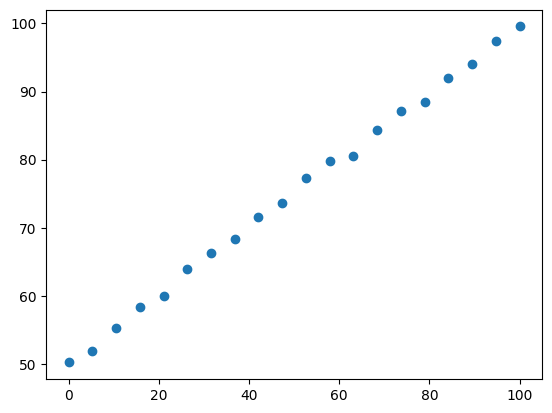

In [6]:
plt.scatter(x, y)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True) # intercept = 截距
# x (N,) --> X (N,1)
model.fit(x[:,np.newaxis], y)
print(model.coef_, model.intercept_) # ~ 0.5, 3

[0.49553795] 50.21528238399842


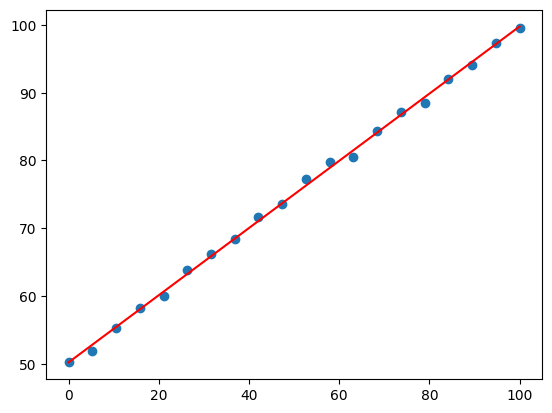

In [8]:
plt.scatter(x, y)
plt.plot(x, model.predict(x[:,np.newaxis]), color="red")

In [9]:
df = pd.DataFrame({
    "1": 1, 
    "x": x,
    "0.49x + 50": 0.49*x + 50, 
    "y": y
})
df
# If input data does not have "1", set fit_intercept=True.
# If input data have "1", set fit_intercept=False.

,1,x,0.49x + 50,y
0,1,0.000000,50.000000,50.195685
1,1,5.263158,52.578947,51.935039
2,1,10.526316,55.157895,55.277990
3,1,15.789474,57.736842,58.306215
4,1,21.052632,60.315789,59.949351
5,1,26.315789,62.894737,63.898216
6,1,31.578947,65.473684,66.213688
7,1,36.842105,68.052632,68.370461
8,1,42.105263,70.631579,71.621159
9,1,47.368421,73.210526,73.566203


In [10]:
X = df.values[:,[0,1]]
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
print(model.coef_, model.intercept_)

[50.21528238  0.49553795] 0.0


In [11]:
# polynomial regression

In [12]:
y = 0.1*x**2 + 0.5*x + 20 + np.random.randn(x.shape[0])
df = pd.DataFrame({
    "1": 1, 
    "x": x,
    "x^2": x**2, 
    "y": y
})
df
# If input data does not have "1", set fit_intercept=True.
# If input data have "1", set fit_intercept=False.

,1,x,x^2,y
0,1,0.000000,0.000000,20.642402
1,1,5.263158,27.700831,24.167398
2,1,10.526316,110.803324,37.493126
3,1,15.789474,249.307479,54.249722
4,1,21.052632,443.213296,77.187177
5,1,26.315789,692.520776,102.675930
6,1,31.578947,997.229917,135.957790
7,1,36.842105,1357.340720,172.505143
8,1,42.105263,1772.853186,217.496927
9,1,47.368421,2243.767313,268.486208


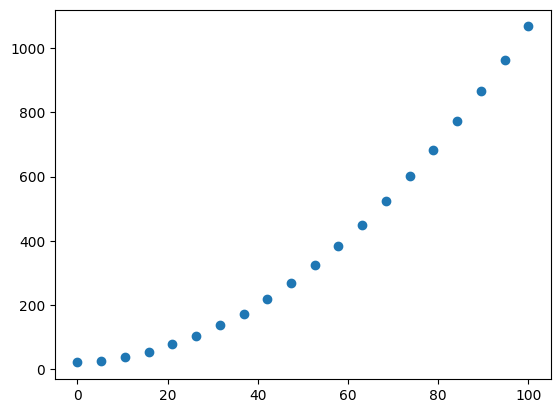

In [13]:
plt.scatter(x, y)

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X = poly.fit_transform(x[:,np.newaxis])
print(X.shape)
X[:5,:]

(20, 3)


array([[  1.        ,   0.        ,   0.        ],
       [  1.        ,   5.26315789,  27.70083102],
       [  1.        ,  10.52631579, 110.8033241 ],
       [  1.        ,  15.78947368, 249.30747922],
       [  1.        ,  21.05263158, 443.2132964 ]])

In [15]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y) # a + bx + cx^2 ~ y
print(model.coef_) # ~ a, b, c

[20.43040098  0.50230372  0.09987335]


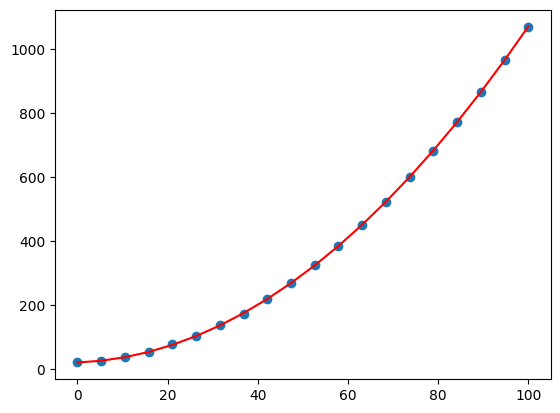

In [16]:
# x --> poly --> model 
plt.scatter(x, y)
y_new = model.predict(poly.transform(x[:,np.newaxis]))
plt.plot(x, y_new, c="red")

In [17]:
# bash: ls | wc
from sklearn.pipeline import make_pipeline
poly_reg = make_pipeline(PolynomialFeatures(2), LinearRegression(fit_intercept=False))
poly_reg.fit(x[:,np.newaxis], y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression(fit_intercept=False))])

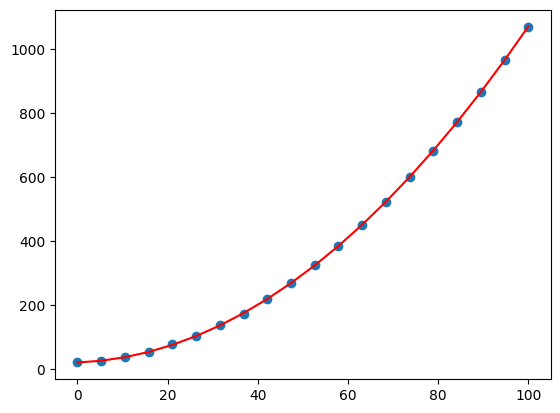

In [18]:
# x --> poly --> model 
plt.scatter(x, y)
y_new = poly_reg.predict(x[:,np.newaxis])
plt.plot(x, y_new, c="red")

## [In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

classification ~ partition the space

PLA: perceptron learning algorithm

- straightforward
- failed if no separating line
- all separating lines are treated equally

In [19]:
# iris
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_model = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.9210526315789473

In [21]:
# NSYSU-digits
# try it

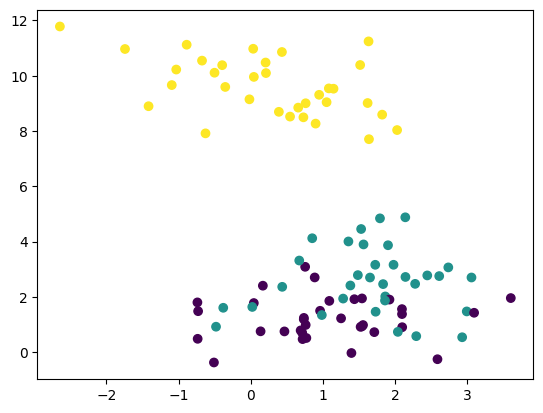

In [22]:
# make_blobs
from sklearn.datasets import make_blobs
X,y = make_blobs(100,2)
plt.scatter(*X.T, c=y)

In [23]:
model = SVC(kernel='poly', degree=2)
model.fit(X, y)

SVC(degree=2, kernel='poly')

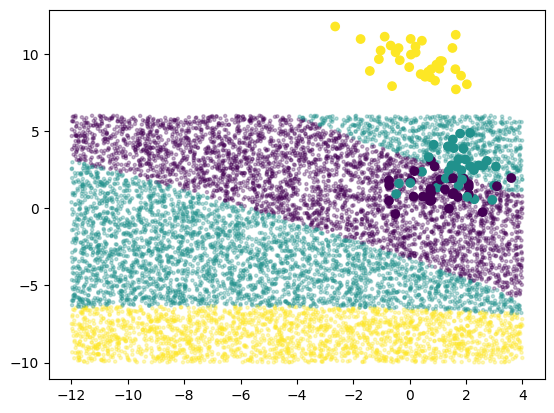

In [24]:
X_test = np.array([
    np.random.rand(10000) * 16 - 12, 
    np.random.rand(10000) * 16 - 10, 
]).T

y_model = model.predict(X_test)
plt.scatter(*X_test.T, c=y_model, s=5, alpha=0.3) # plot predicted data
plt.scatter(*X.T, c=y) # plot original data

[kernel](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py)
1. taking the points into a new space
2. distort the original distances

Read textbook: [Example: Face Recognition](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html#Example:-Face-Recognition)

## [In-Depth: Decision Trees and Random Forests](https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html)

classification ~ partition the space

decision tree = how to partition the space

In [25]:
# iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [26]:
# NSYSU-digits

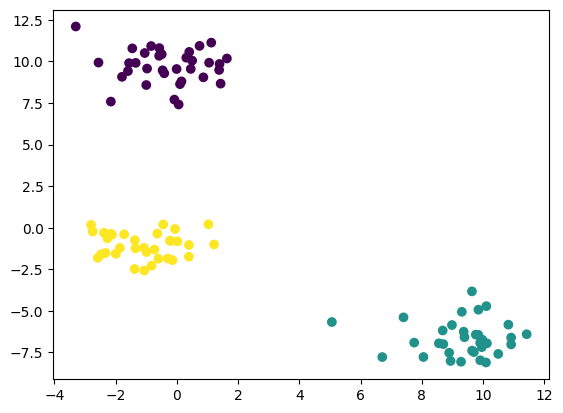

In [27]:
# make_blobs
from sklearn.datasets import make_blobs
X,y = make_blobs(100,2)
plt.scatter(*X.T, c=y)

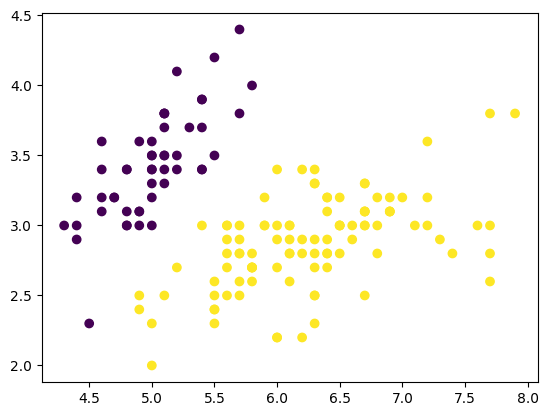

In [28]:
# use iris
# iris
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,[0,1]]
y = iris.target
y[y == 2] = 1
plt.scatter(*X.T, c=y)

In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

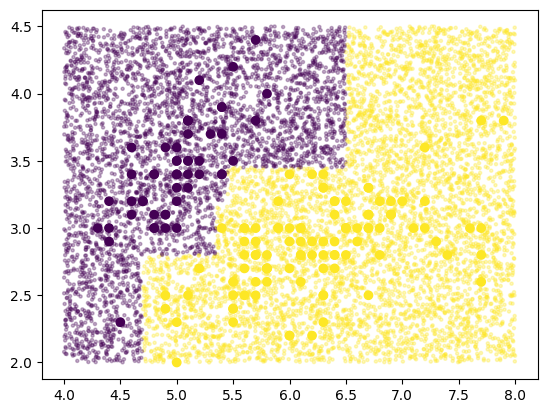

In [30]:
X_test = np.array([
    np.random.rand(10000) * 4 + 4, 
    np.random.rand(10000) * 2.5 + 2, 
]).T

y_model = model.predict(X_test)
plt.scatter(*X_test.T, c=y_model, s=5, alpha=0.3) # plot predicted data
plt.scatter(*X.T, c=y) # plot original data

[Text(0.5416666666666666, 0.9, 'x[0] <= 5.45\ngini = 0.444\nsamples = 150\nvalue = [50, 100]'),
 Text(0.3333333333333333, 0.7, 'x[1] <= 2.8\ngini = 0.233\nsamples = 52\nvalue = [45, 7]'),
 Text(0.4375, 0.8, 'True  '),
 Text(0.16666666666666666, 0.5, 'x[0] <= 4.7\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.5, 0.5, 'x[0] <= 5.35\ngini = 0.043\nsamples = 45\nvalue = [44, 1]'),
 Text(0.4166666666666667, 0.3, 'gini = 0.0\nsamples = 39\nvalue = [39, 0]'),
 Text(0.5833333333333334, 0.3, 'x[1] <= 3.2\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.75, 0.7, 'x[1] <= 3.45\ngini = 0.097\nsamples = 98\nvalue = [5, 93]'),
 Text(0.6458333333333333, 0.8, '  False'),
 Text(0.6666666666666666, 0.5, 'gini = 0.0\nsamples 

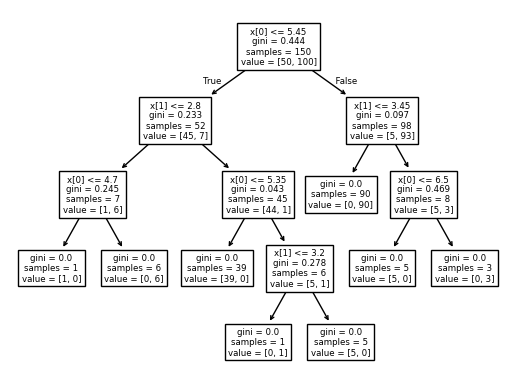

In [31]:
from sklearn.tree import plot_tree
plot_tree(model)

ensemble learning 集合學習
1. bagging samples
2. bagging features
3. vote!

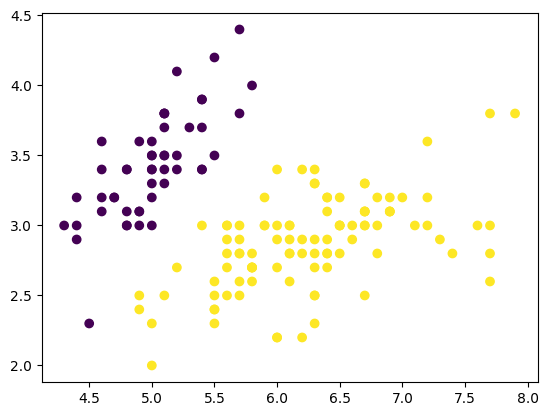

In [32]:
# use iris
# iris
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,[0,1]]
y = iris.target
y[y == 2] = 1
plt.scatter(*X.T, c=y)

In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

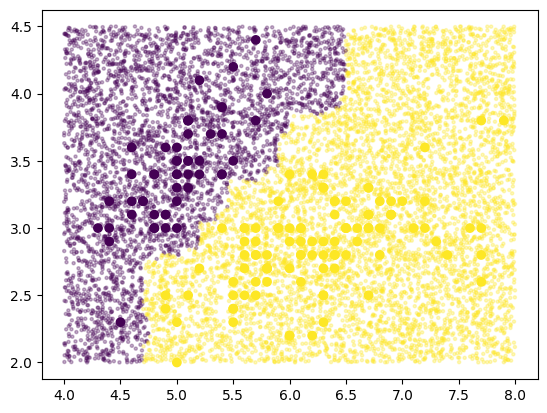

In [34]:
X_test = np.array([
    np.random.rand(10000) * 4 + 4, 
    np.random.rand(10000) * 2.5 + 2, 
]).T

y_model = model.predict(X_test)
plt.scatter(*X_test.T, c=y_model, s=5, alpha=0.3) # plot predicted data
plt.scatter(*X.T, c=y) # plot original data

## [In Depth: Principal Component Analysis](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

PCA: find the best projection

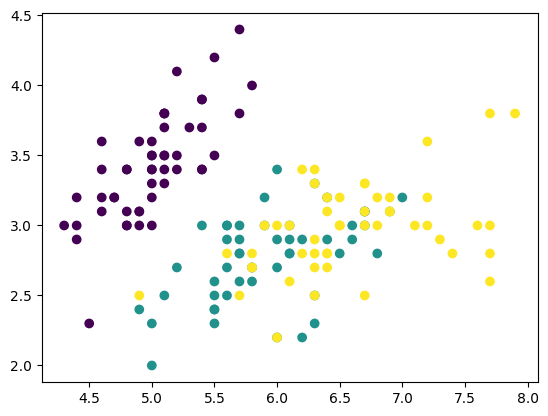

In [35]:
# iris
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
plt.scatter(X[:,0], X[:,1], c=y)

In [36]:
from sklearn.decomposition import PCA
model = PCA(2) # drop the dimension from 4 to 2
X_new = model.fit_transform(X)

(150, 2)


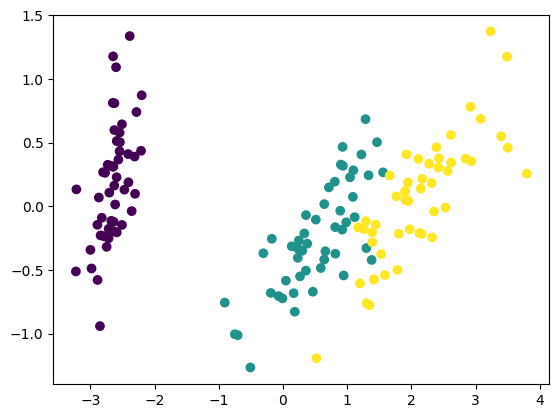

In [37]:
print(X_new.shape)
plt.scatter(*X_new.T, c=y)

In [38]:
# PCA = SVD 奇異值分解
# singular values = s1 > s2 > ... > 0
# explained_variance = s1 + s2 + ... + sk

In [39]:
from sklearn.decomposition import PCA
model = PCA(4) # drop the dimension from 4 to 2
X_new = model.fit_transform(X)
model.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

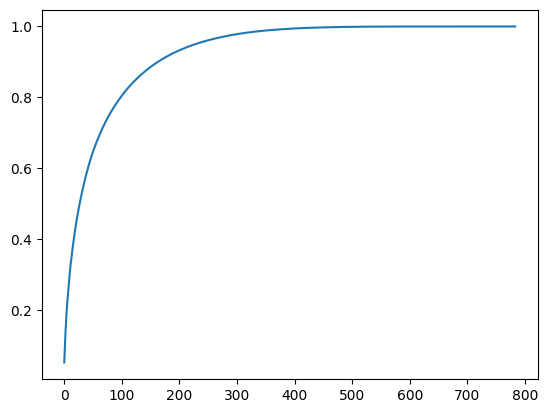

In [40]:
# NSYSU-digits (1890,784)
from sklearn.decomposition import PCA
model = PCA(784) # drop the dimension from 4 to 2
Xsys_new = model.fit_transform(Xsys)
exv = model.explained_variance_ratio_
plt.plot(exv.cumsum())

In [41]:
# a circle in R^100

elbow method

Purpose of dimensionality reduction:
1. data visualization
2. make computation more efficient

## Homework

- Type your answers here and submit your answer in `*.ipynb` format.
- You may use code cell and Markdown cell.

In [1]:
NAME = "李瑋宸" # change to your name
STD_ID = "B123245008" # change to your student ID
print("My name is %s and my student ID is %s."%(NAME, STD_ID))

My name is 李瑋宸 and my student ID is B123245008.


### Exercise 1: Linear SVM Classification

Use the Iris dataset and train a linear SVM using `SVC(kernel='linear')` to classify species based on two features. Plot the decision boundaries.

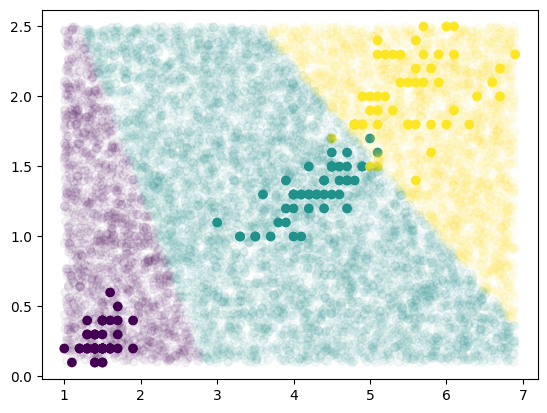

In [43]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data[:, 2:4]
y = iris.target

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(x, y)
model = SVC(kernel = 'linear')
model.fit(x_train, y_train)
y_new = model.predict(x_test)

import matplotlib.pyplot as plt

plt.scatter(x[:,0], x[:,1], c=y, alpha=1)

x_draw_bound = np.array([
    np.random.rand(10000) * (np.max(x[:,0])-np.min(x[:,0])) + np.min(x[:,0]),
    np.random.rand(10000) * (np.max(x[:,1])-np.min(x[:,1])) + np.min(x[:,1])
]).T

y_model = model.predict(x_draw_bound)
plt.scatter(x_draw_bound[:,0], x_draw_bound[:,1], c=y_model, alpha=0.05)

### Exercise 2: Nonlinear SVM with RBF Kernel

Use `SVC(kernel='rbf')` to classify a dataset with a non-linear decision boundary (e.g., `make_circles`). Experiment with `gamma` parameter.

Text(0.5, 1.0, 'SVC with RBF kernel,gamma=0.1')

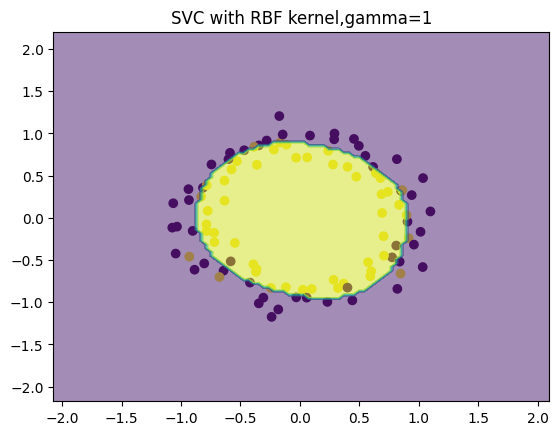

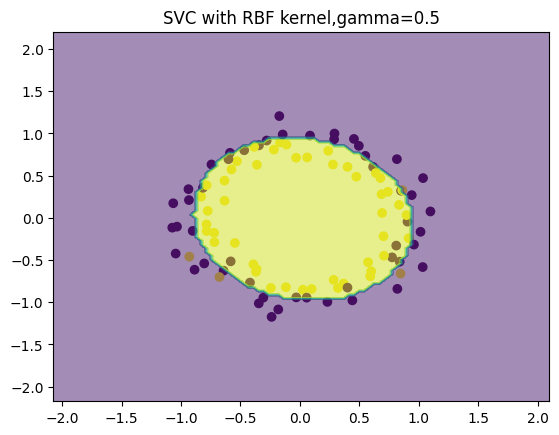

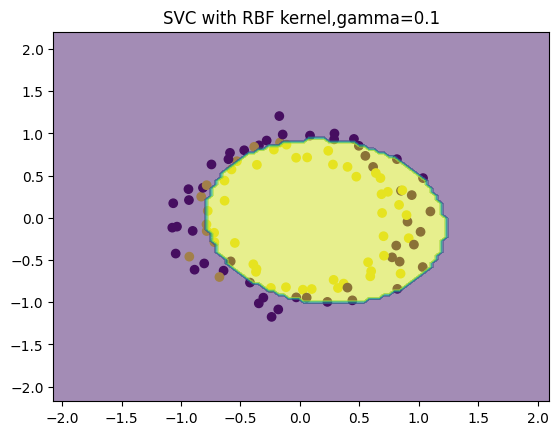

In [44]:
from sklearn.datasets import make_circles
make_circle = make_circles(n_samples=100, noise=0.1)
x = make_circle[0]
y = make_circle[1]

from sklearn.svm import SVC


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)


import matplotlib.pyplot as plt
import numpy as np
plt.scatter(x[:,0], x[:,1], c=y, alpha=1)

x0_min, x0_max = x[:, 0].min() - 1, x[:, 0].max() + 1
x1_min, x1_max = x[:, 1].min() - 1, x[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x0_min, x0_max, 100), 
                     np.linspace(x1_min, x1_max, 100))

model = SVC(kernel='rbf', gamma=1)
model.fit(x,y)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.5)
plt.title("SVC with RBF kernel,gamma=1")

model = SVC(kernel='rbf', gamma=0.5)
model.fit(x,y)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.scatter(x[:,0], x[:,1], c=y, alpha=1)
plt.contourf(xx, yy, Z, alpha=0.5)
plt.title("SVC with RBF kernel,gamma=0.5")

model = SVC(kernel='rbf', gamma=0.1)
model.fit(x,y)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.scatter(x[:,0], x[:,1], c=y, alpha=1)
plt.contourf(xx, yy, Z, alpha=0.5)
plt.title("SVC with RBF kernel,gamma=0.1")



### Exercise 3: SVM Regularization

Create a synthetic dataset and train SVMs with different values of `C`. 

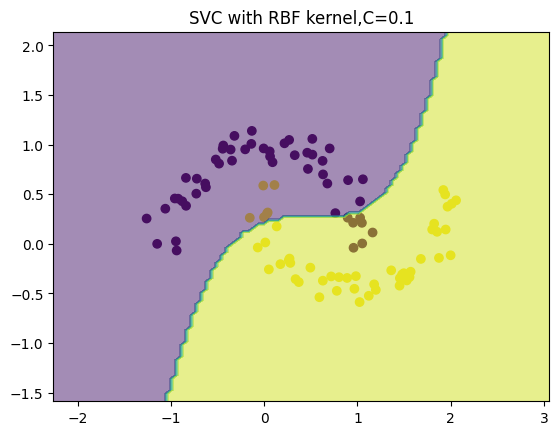

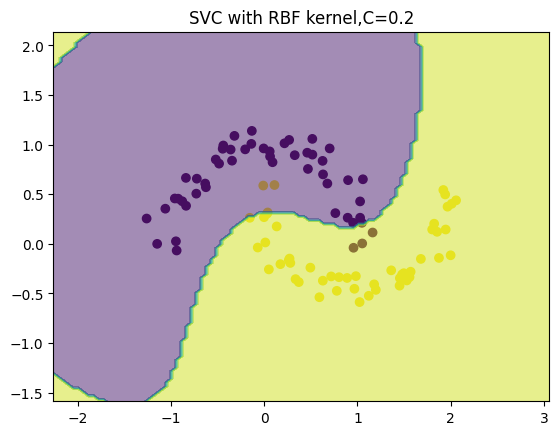

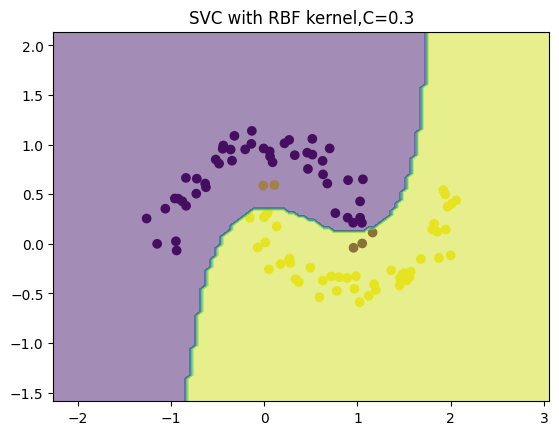

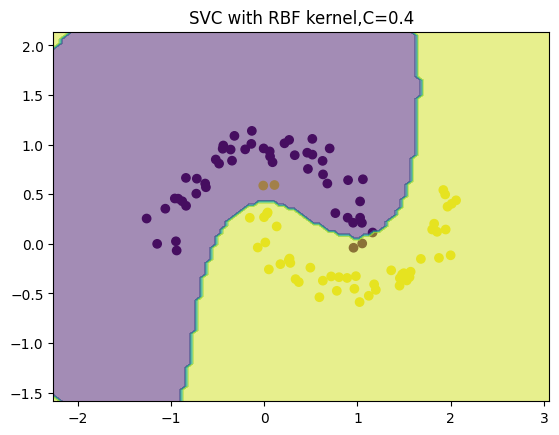

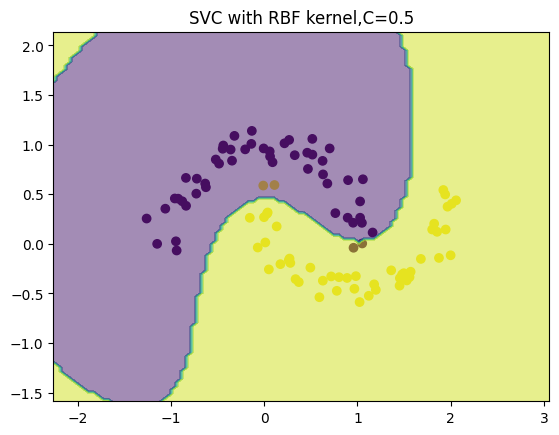

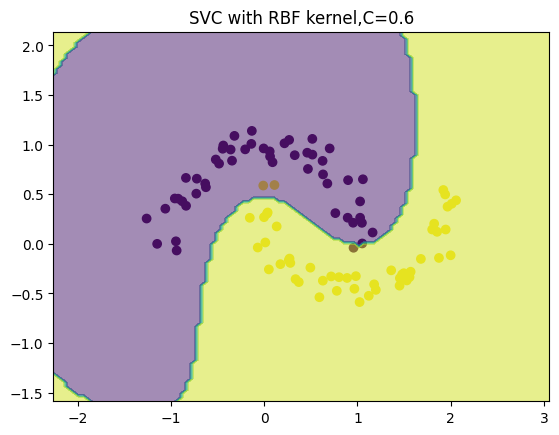

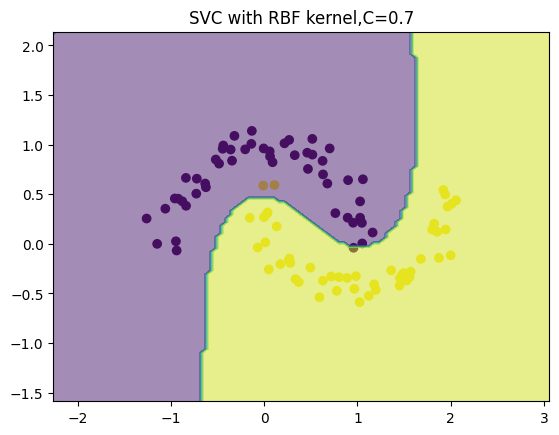

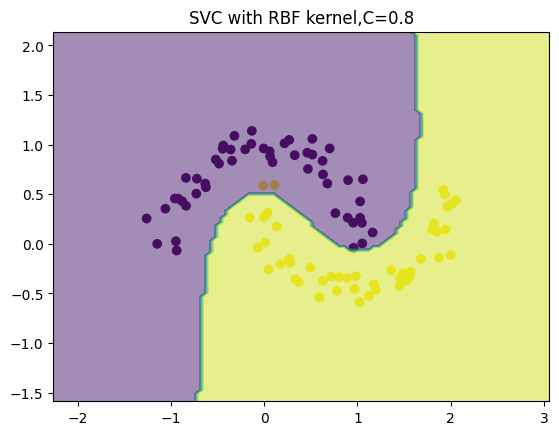

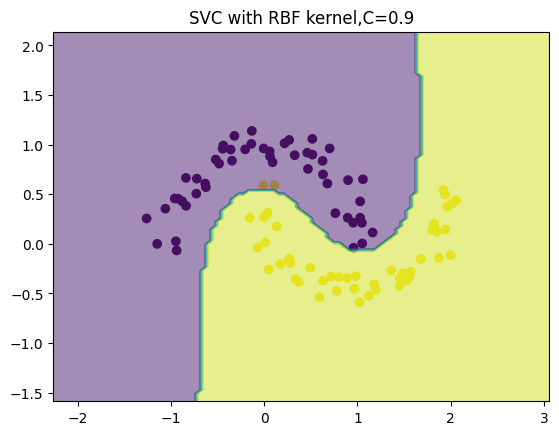

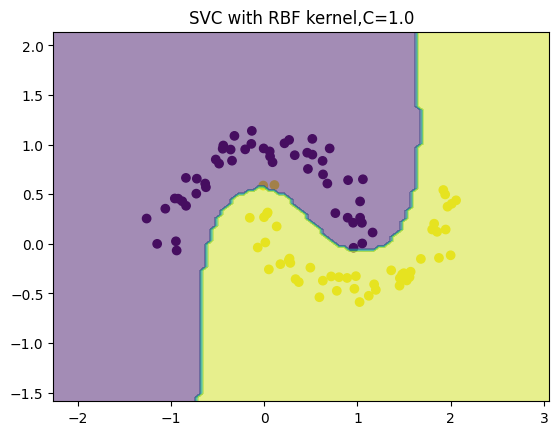

In [45]:
from sklearn.datasets import make_moons
make_moon = make_moons(n_samples=100, noise=0.1)
x = make_moon[0]
y = make_moon[1]

x0_min,x0_max = x[:,0].min()-1, x[:,0].max()+1
x1_min,x1_max = x[:,1].min()-1, x[:,1].max()+1
xx,yy = np.meshgrid(np.linspace(x0_min,x0_max,100),
                    np.linspace(x1_min,x1_max,100))

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

for i in range(1,11):
    model = SVC(kernel='rbf',C=i/10)
    model.fit(x,y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.scatter(x[:,0], x[:,1], c=y, alpha=1)
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.title(f"SVC with RBF kernel,C={i/10}")

### Exercise 4: Multiclass SVM

Use the digits dataset from scikit-learn and apply SVM for multiclass classification. Evaluate accuracy and confusion matrix.

accuracy_score: 0.987037037037037


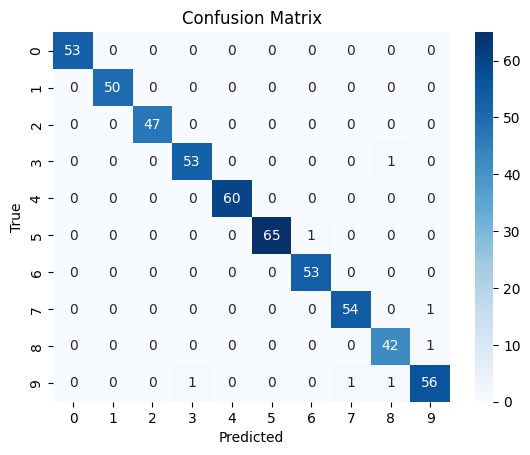

In [46]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
digits = load_digits()
x = digits.data
y = digits.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = SVC()
model.fit(x_train, y_train)
y_new = model.predict(x_test)
print("accuracy_score:",accuracy_score(y_test, y_new))
sns.heatmap(confusion_matrix(y_test, y_new), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Exercise 5: Decision Tree Classifier

Train a `DecisionTreeClassifier` on the Titanic dataset.  (You don't have to use all features.) Visualize the decision tree using `plot_tree` or `graphviz`. Interpret key splits and overfitting behavior.

accuracy_score: 0.6692111959287532


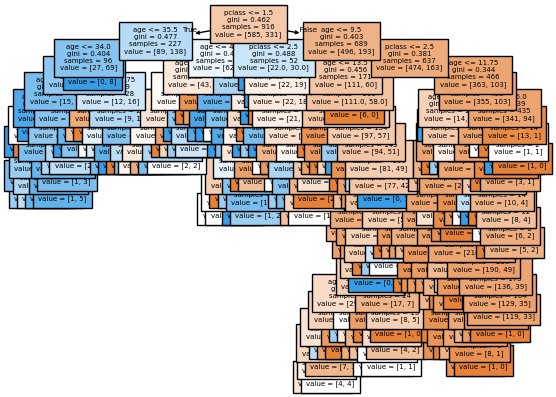

In [47]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


titanic = fetch_openml(name='titanic', version=1, as_frame=True)
x = titanic.data.select_dtypes(include=[np.number])
x = x[["pclass", "age"]]
y = titanic.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_new = model.predict(x_test)
print("accuracy_score:",accuracy_score(y_test, y_new))
plot_tree(model, feature_names=x.columns, filled=True,fontsize=5)
plt.show()

# pclass is likely the key split, followed by age.
# the overfitting problem is likely to occur, as the decision tree is too complex and fits the training data too closely.


### Exercise 6: Tree Depth and Pruning

Experiment with `max_depth` and `min_samples_split` on a synthetic dataset to observe effects on model complexity and performance.

max_depth: 3
min_samples_split: 2
accuracy_score: 0.8


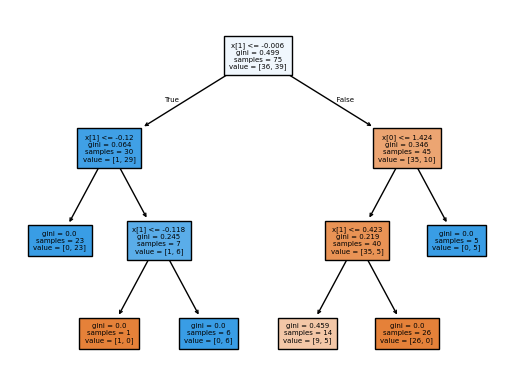

max_depth: 3
min_samples_split: 15
accuracy_score: 0.8


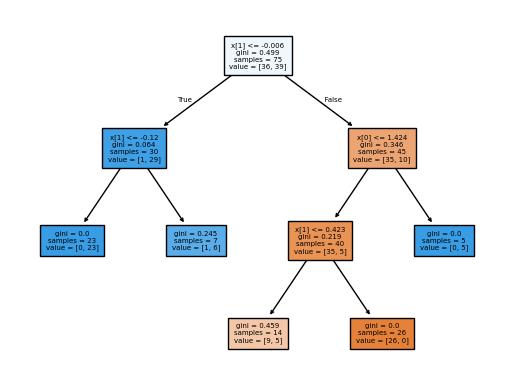

max_depth: 6
min_samples_split: 2
accuracy_score: 0.92


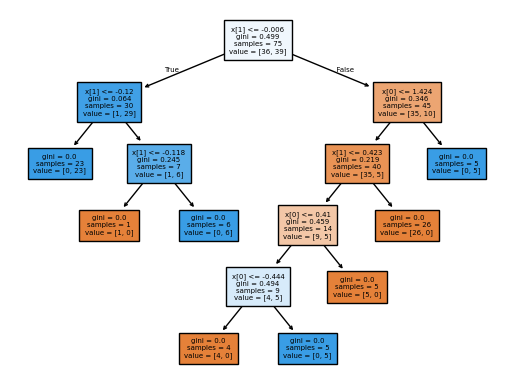

max_depth: 6
min_samples_split: 15
accuracy_score: 0.8


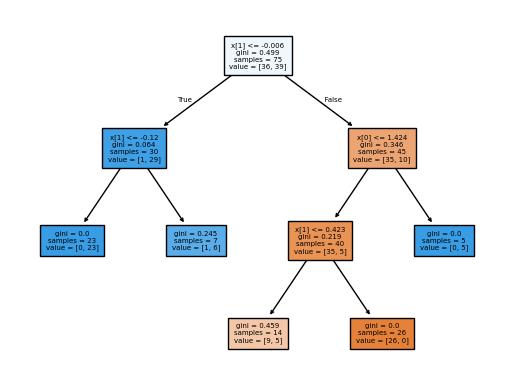

In [48]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.datasets import make_moons

make_moon = make_moons(n_samples=100, noise=0.1)
x = make_moon[0]
y = make_moon[1]
x_train, x_test, y_train, y_test = train_test_split(x, y)

for i in [3,6]:
    for j in [2,15]:
        model = DecisionTreeClassifier(max_depth=i,min_samples_split=j)
        model.fit(x_train,y_train)
        y_new = model.predict(x_test)
        print("max_depth:",i)
        print("min_samples_split:",j)
        print("accuracy_score:",accuracy_score(y_test, y_new))
        plot_tree(model, filled=True,fontsize=5)
        plt.show()

### Exercise 7: Random Forests for Feature Importance

Train a `RandomForestClassifier` on the iris dataset. Extract and visualize feature importances. Which features are most predictive?

Feature ranking:
1. feature petal width (cm) (0.440671)
2. feature petal length (cm) (0.435676)
3. feature sepal length (cm) (0.102370)
4. feature sepal width (cm) (0.021283)


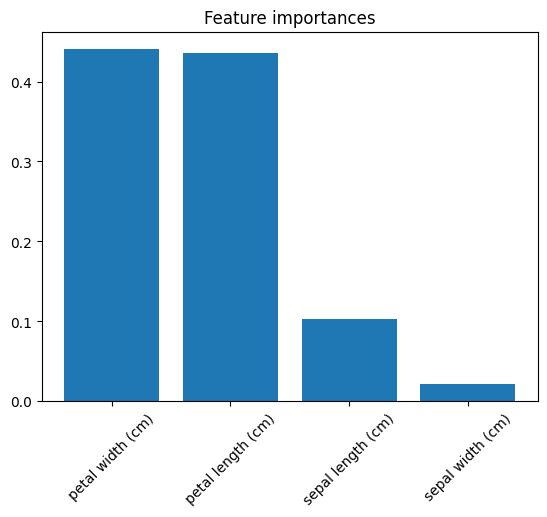

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
y = iris.target
features = iris.feature_names

model = RandomForestClassifier(n_estimators=100)
importances = model.fit(x, y).feature_importances_
indices = np.argsort(importances)[::-1]
features = np.array(features)[indices]
print("Feature ranking:")
for f in range(x.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, features[f], importances[indices[f]]))
plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices], align="center")
plt.xticks(range(x.shape[1]),features, rotation=45)
# plt.xlim([-1, x.shape[1]])
plt.show()


### Exercise 8: Comparing Decision Tree and Random Forest

For each of Decision Treee Classifier and Random Forest Classifier, point out a good point and a bad point.

#### Decision Tree Classifier

- Good Point: 
Interpretability. Decision trees are easy to understand and interpret. The tree structure clearly shows the decision-making process, making it simple to follow how a prediction is made based on the features. This is valuable for applications where understanding the reasoning behind predictions is important. 

- Bad Point:
Tendency to Overfit. Decision trees can easily overfit the training data, especially if they are allowed to grow very deep. They might learn the noise and specific details of the training set, leading to poor performance on unseen data.

#### Random Forest Classifier

- Good Point: 
High Predictive Accuracy and Robustness. Random forests generally achieve higher predictive accuracy and are more robust than individual decision trees. By aggregating the predictions of multiple trees, they reduce the risk of overfitting and are less sensitive to noise and outliers in the data. 

- Bad Point:
 Lower Interpretability. Random forests are often considered "black box" models because it's difficult to understand the exact decision-making process of the entire ensemble of trees. While feature importance can be assessed, tracing the path of a single prediction through the entire forest is complex.

### Exercise 9: PCA for Visualization

Use PCA to reduce the dimensionality of the NSYSU-digits dataset to 2 components. Visualize the result using a scatter plot colored by class label.

In [50]:
### load nsysu

import os
import urllib
import numpy as np

base = r"https://github.com/SageLabTW/auto-grading/raw/master/nsysu-digits/"
for c in ['X', 'y']:
    filename = "nsysu-digits-%s.csv"%c
    if filename not in os.listdir('.'):
        print(filename, 'not found --- will download')
        urllib.request.urlretrieve(base + c + ".csv", filename)

Xsys = np.genfromtxt('nsysu-digits-X.csv', dtype=int, delimiter=',') ### flattened already
ysys = np.genfromtxt('nsysu-digits-y.csv', dtype=int, delimiter=',')

### Exercise 10: Variance Explained

Apply PCA to NSYSU-digits. Plot the cumulative explained variance ratio. How many components are needed to retain 95% of the variance?

Explained variance ratio for each component: [5.15819893e-02 4.18491370e-02 3.91155276e-02 3.24146315e-02
 2.74741438e-02 2.32517281e-02 2.06964671e-02 1.98846360e-02
 1.95864137e-02 1.82736110e-02 1.78580499e-02 1.58837853e-02
 1.39470826e-02 1.34886747e-02 1.30872908e-02 1.26066463e-02
 1.22083482e-02 1.16292691e-02 1.14789177e-02 1.09722226e-02
 1.05498022e-02 1.02762270e-02 1.01803555e-02 9.64366856e-03
 9.24341309e-03 8.76910416e-03 8.35346521e-03 8.21236259e-03
 8.01768945e-03 7.90663605e-03 7.71825535e-03 7.59546157e-03
 7.31723913e-03 7.22608812e-03 6.85383556e-03 6.77373979e-03
 6.72448446e-03 6.59500956e-03 6.54034399e-03 6.11377824e-03
 5.96318289e-03 5.86869527e-03 5.76089805e-03 5.54934907e-03
 5.49119661e-03 5.32880235e-03 5.19515412e-03 5.11458124e-03
 5.02274995e-03 4.87058965e-03 4.79590259e-03 4.65601301e-03
 4.55197700e-03 4.41774089e-03 4.34681191e-03 4.24302117e-03
 4.19824209e-03 4.14664197e-03 4.10527030e-03 3.98922602e-03
 3.90495015e-03 3.88126508e-03 3.8234794

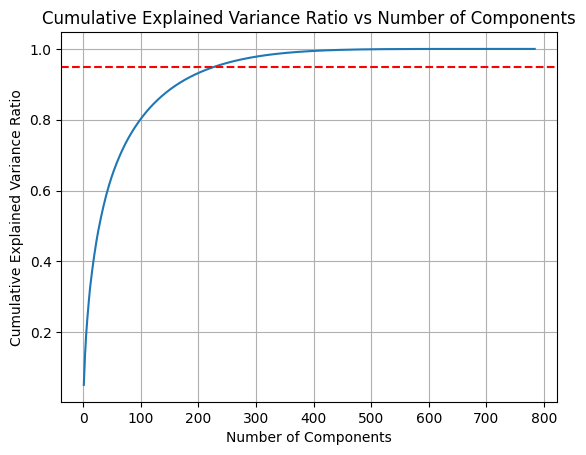

Number of components to retain 95.0% variance: 229


In [51]:
from sklearn.decomposition import PCA

model = PCA()
model.fit(Xsys)

explained_variance_ratio = model.explained_variance_ratio_
print("Explained variance ratio for each component:", explained_variance_ratio)
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs Number of Components')
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Retained')
plt.show()

desired_variance_threshold = 0.95
n_components = np.argmax(cumulative_explained_variance_ratio>= desired_variance_threshold) + 1
print(f"Number of components to retain {desired_variance_threshold*100}% variance: {n_components}")